In [1]:
import gzip
import numpy as np
import struct

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

In [2]:
# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
        if not label:
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols), dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
    return res


# one-hot encode a 1-D array
def one_hot_encode(array, num_of_classes):
    return np.eye(num_of_classes)[array.reshape(-1)]

In [3]:
X_train = load_data("train-images-idx3-ubyte.gz") / 255.0
X_test = load_data("t10k-images-idx3-ubyte.gz") / 255.0
y_train = load_data("train-labels-idx1-ubyte.gz",True).reshape(-1)
y_test = load_data("t10k-labels-idx1-ubyte.gz",True).reshape(-1)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

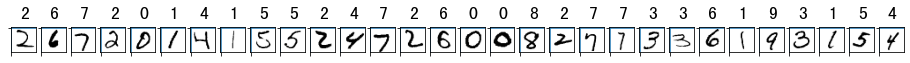

In [5]:
count = 0
sample_size = 30
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep = '\n')

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### add MLPClassifier code

In [8]:
#首先是模型需要用到的函数MLPClassifier()，函数包含很多参数，其中最重要的solver有三个，我经过测试挑选了两个，lbfgs和sgd

In [9]:
#拟牛顿法，需要较多的迭代次数，所以max_iter默认200，两个100个节点的隐藏层
lbfgs = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = [100,100], activation = 'relu', 
                      alpha = 1e-4, random_state = 100, verbose = 1)

In [10]:
#基于梯度下降的自适应优化算法，分批训练数据
sgd = MLPClassifier(solver = 'sgd', hidden_layer_sizes = [100,100], activation = 'relu', 
                    alpha = 1e-4, random_state = 100, verbose = 1, learning_rate_init = 0.1)

In [11]:
#训练模型
lbfgs.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[100, 100], random_state=100, solver='lbfgs',
              verbose=1)

In [12]:
sgd.fit(X_train, y_train)

Iteration 1, loss = 0.28472902
Iteration 2, loss = 0.11167761
Iteration 3, loss = 0.08115037
Iteration 4, loss = 0.06247965
Iteration 5, loss = 0.04958853
Iteration 6, loss = 0.04138274
Iteration 7, loss = 0.03351079
Iteration 8, loss = 0.02792778
Iteration 9, loss = 0.02429025
Iteration 10, loss = 0.02075366
Iteration 11, loss = 0.01670537
Iteration 12, loss = 0.01469314
Iteration 13, loss = 0.01257583
Iteration 14, loss = 0.01021119
Iteration 15, loss = 0.00776844
Iteration 16, loss = 0.00705926
Iteration 17, loss = 0.00695295
Iteration 18, loss = 0.00775245
Iteration 19, loss = 0.00743995
Iteration 20, loss = 0.00797835
Iteration 21, loss = 0.00689074
Iteration 22, loss = 0.00490913
Iteration 23, loss = 0.00426998
Iteration 24, loss = 0.00299917
Iteration 25, loss = 0.00430734
Iteration 26, loss = 0.00472019
Iteration 27, loss = 0.00424544
Iteration 28, loss = 0.00798867
Iteration 29, loss = 0.00534286
Iteration 30, loss = 0.00224285
Iteration 31, loss = 0.00062618
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[100, 100], learning_rate_init=0.1,
              random_state=100, solver='sgd', verbose=1)

In [13]:
#预测
lbfgs_predict = lbfgs.predict(X_test)
sgd_predict = sgd.predict(X_test)

In [14]:
print("lbfgs在训练集准确度: %f" % lbfgs.score(X_train, y_train))
print("lbfgs在测试集准确度: %f" % lbfgs.score(X_test, y_test))

lbfgs在训练集准确度: 1.000000
lbfgs在测试集准确度: 0.974800


In [15]:
print("sgd在训练集准确度: %f" % sgd.score(X_train, y_train))
print("sgd在测试集准确度: %f" % sgd.score(X_test, y_test))

sgd在训练集准确度: 1.000000
sgd在测试集准确度: 0.982800


In [16]:
#导入图像处理工具
from PIL import Image
#打开图像
image = Image.open("write_5.png").convert('F')
#调整图像的大小
image = image.resize((28,28))
arr = []
#将图像中的像素作为预测数据点的特征
for i in range(28):
    for j in range(28):
        pixel = 1.0 - float(image.getpixel((j,i)))/255.
        arr.append(pixel)
#由于只有一个样本,所以需要进行reshape操作
arr1 = np.array(arr).reshape(1,-1)
#进行图像识别
print('图片中的数字是:{:.0f}'.format(sgd.predict(arr1)[0]))

图片中的数字是:5
